# __The Black-Scholes-Merton Model__

Based on __Hull: Options, Futures and other derivatives, 9th edition__

__Charters 14, 15__

<br>

## __Brownian Motion. Diffusion processes.__

<br>

### __A Discrete-time Prototype for Brownian Motion__

Suppose we have a finite time interval $[0,T]$. We divide it into $n$ time periods of length $∆t$ each and equally spaced by $n+1$ time points $t_i = i∆$, $~~i = 0,1, 2,...,n$.

Consider a discrete-time stochastic process defined as follows: 

$B_0=0$,

$B_i = B_{i-1} + \epsilon_i \sqrt{∆t} $, $~~i = 1, 2,...,n$

where $~\{\epsilon_i,~i = 1, 2,...,n\}$ are independent standard normal random variables, $\epsilon_i \sim N(0,1)$,$~~i = 1, 2,...,n$. 


#### __Monte Carlo Simulation__ 

In [1]:
import sys
path = '/home/jupyter-slava/teaching/lib/bsm'
sys.path.append(path)
import numpy as np
from MC import *

In [2]:
res = [BM(1,252) for i in range(3)]
x = np.arange(0,252+1)*1/252
data = {'x': x, 'y': res}
plotParam = {'width': 12, 'height': 6, 'n': 2}

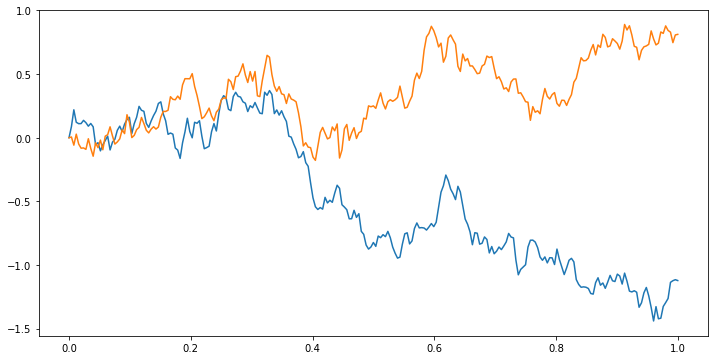

In [3]:
PlotPaths(data,plotParam)

__Properties__ of the process $\{B_i=B(t_i),~i = 0, 1,...,n\}$: 

1. Since $B_i = \sum_{k=1}^{i}\epsilon_i \sqrt{∆t}$ is the sum of $i$ independent normal random variables and thus is normally distributed with zero mean and variance equal to $i\Delta t = t_i$:

    $E[B_i] = 0$,

    $Var[B_i] = t_i$

2. The increment of the process

    $\Delta B_i:= B_{i}-B_{i-1} = \epsilon_i \sqrt{∆t} $

    is normally distributed with zero mean and variance equal to $\Delta t$.
    
3. More generally, the increment of the process $B_i-B_j$ is normally distributed with zero mean and variance  $(i-j)\Delta t = t_i - t_j$ (the length of the time interval between $t_i$ and $t_j$). 

4. Consider the squares of the increments $(\Delta B_i)^2 = (B_i-B_{i-1})^2$. The mean and variance of the square of the increment are: 

$E[(\Delta B_i)^2] = \Delta t$

$Var[(\Delta B_i)^2] = E[(\Delta B_i)^4] - E[(\Delta B_i)^2]^2 = 3\Delta t^2 - \Delta t^2 = 2 \Delta t^2$

where we used the fact that $E[\epsilon^4]=3$.



<br>

### __Brownian Motion__

A standard Brownian motion process (or Wiener process) $\{B_t=B(t), 0 \ge t \ge T\}$ is obtained by taking the limit $∆t→0$. In the limit of infinitesimal time steps $dt$, formal properties of infinitesimal increments of standard Brownian motion are: 

   $d B_t = \epsilon \sqrt{dt},~~~~~~~~~\epsilon \sim N(0,1)$
   
   $E[d B_t]=0$
   
   $Var[d B_t] = E[dB^2_t] = dt$
   
 
__Important property of Browian Motion__: 

$dB^2_t = dt$
 
This is because the variance of $(∆B)^2$ is of the order $(∆t)^2$. In the limit we can approximate it as non-random and equal to its expected value

<br>


__Definition__: A real-valued continuous-time stochastic process $\{B_t, t≥0\}$ is a standard Brownian motion (Wiener process) if it satisfies the following properties:

1. The process is starting at the origin: $B(0)=0$

2. The process has continuous sample paths.

3.  For any $0\le t_1\le t_2 \le t_3 \le t_4$, the increments $B(t_2)-B(t_1)$ and $B(t_4)-B(t_3)$ are independent

4.  For any $0\le t_1\le t_2$, the increments $B(t_2)-B(t_1)$  is a normal random variable with zero mean and variance equal to $t_2-t_1$.
  
  

These properties parallel the properties of the discrete-time process we have constructed. Brownian sample paths are continuous but not  differentiable with respect to time - they are very jagged! They also have unbounded variation.



<br>

### __Generalized Wiener Process__

Let $\{B_t,t ≥ 0\}$ be a standard Brownian motion and $a,b,x \in \mathbb{R}$. Consider a process $\{X_t,t ≥ 0\}$ defined by:

$X_0 = x$,

$dX_t = adt +b dB_t $

This process is called Brownian motion (Wiener process) with drift coefficient $a$, diffusion coefficient $b$, and starting at $x$. 

__Properties__:

1. The process starts at some point $x$ at $t=0$. 

2. For any $0\le t_1\le t_2$, the increments $X(t_2)-X(t_1)$  is a normal random variable with mean $a(t_2-t_1)$ and variance equal to $b^2(t_2-t_1)$.

3. For any $0\le t_1\le t_2 \le t_3 \le t_4$, the increments $X(t_2)-X(t_1)$ and $X(t_4)-X(t_3)$ are independent

The parameter $a$ measures the _drift rate_ of the process. The parameter $b$ measures the _dispersion rate_ of the process. The process diffuses around the deterministic trajectory at with diffusion coefficient $b$.  

In [4]:
n = 252*2
param = [{'x': 0,'a':0,'b':8},{'x': 2,'a':4,'b':2},{'x': 2,'a':2,'b':6}]
x = np.arange(0,n+1)*1/252 
res = [GenWP(2,n,param[i]) for i in range(3)]
data = {'x': x, 'y': res}
plotParam = {'width': 12, 'height': 6, 'n': 3}

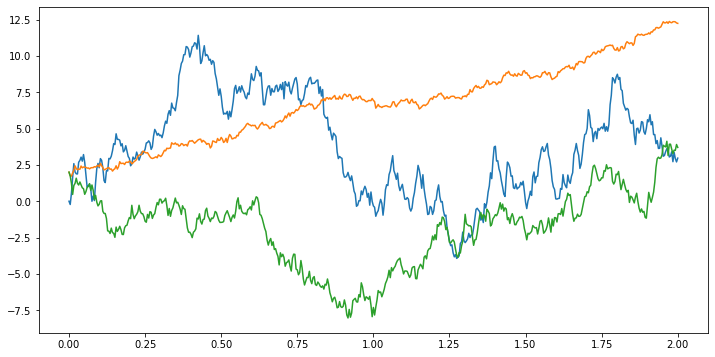

In [5]:
PlotPaths(data,plotParam)

<br>

### __Diffusion Processes__

When drift and diffusion coefficients depend on the state variable and time, we call this process as _Ito diffusion process_:

$X_0 = x$,

$dX_t = a(X_t,t)dt + b(X_t,t)dB_t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(1)$ 




<br>

### __Ito's Lemma__

Ito's lemma derives the stochastic equation for functions of stochastic variables.

Suppose $\{X_t,t ≥ 0\}$ is a diffusion process, which follows the SDE $(1)$:  


Let $f(x,t)$ be a twice continuously differentiable function of two variables and define a
new process $\{f_t := f(X_t,t), t≥0\}$.

Let's calculate a differential of this process using the Taylor expansion: 

 
$df_t =  \frac{\partial f}{\partial t}dt + \frac{\partial f}{\partial x}dX + \frac{1}{2} \frac{\partial^2 f}{\partial t^2}dt^2 + \frac{1}{2} \frac{\partial^2 f}{\partial X^2}dX^2 + \frac{1}{2} \frac{\partial^2 f}{\partial x \partial t}dXdt + ...$

Now recall the property of Brownian motion $dB^2=dt$.

Substitute this into the Taylor series and keep only the terms of order $O(dt)$ or less, we get that:

$df_t =  \frac{\partial f}{\partial t}dt + \frac{\partial f}{\partial x}dX + \frac{1}{2} \frac{\partial^2 f}{\partial X^2}dX^2 = \left(\frac{\partial f}{\partial t} + a(.) \frac{\partial f}{\partial x}+\frac{1}{2} b^2(.) \frac{\partial^2 f}{\partial X^2}\right)dt + b(.) \frac{\partial f}{\partial x}dB$
    
   

<br>

## __Model of Asset Price Dynamics__

  

### __Riskless asset__

First, consider a riskless asset: a money market account. At time zero we deposit one dollar: 

$A_0 = 1$

The money market account balance grows at the continuously compounded risk-free rate $r$. Over $dt$ the change in the account value is:

$dA = rA_tdt$

The _percentage return_ over $dt$ is:

$\frac{dA_t}{A_t} = rdt$

At time $t≥0$ the value of our money market account is:

$A_t = e^{rt}$


### __Risky asset__

Suppose now that $S_t$ is the price at time $t$ of a risky asset (e.g. stock) that pays no dividends. We will model its time evolution by some Ito diffusion process. The stock price at time zero is known: 

$S_0 = S$

What is a reasonable choice of the functional form for the drift and diffusion coefficients $a(S_t,t)$ and $b(S_t,t)$? 

Let's take a look at typical pattern of the distrubution of historical stock prices. For example, the hystogram of dayily stock returns usually looks like normal.

$\frac{S_{i+1}-S_i}{S_i} \sim $ _mean_ + _standard deviation_ $\times \epsilon~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(2)$

##### __Timescales__

_Returns_: At small time steps the returns in simple compounding is approximatatly equal to _log-returns_ (in the continuous-time limit $dt$ they are the equivalent). 
Since lod-returns are additive, they scales with the size of the time step. Thus we can write _mean_ from $(2)$ as $m \Delta t$.

_Diffusion_: Since variances of returns are additive, they scales with the size of the time step. It implies _standard deviation_ from $(2)$ depends on time step as $\sim  \sqrt{\Delta t}$, and can be written as $\sigma \sqrt{\Delta t}$. 

So equation $(**)$ takes the following form:

$\frac{S_{i+1}-S_i}{S_i} = m \Delta t + \sigma \sqrt{\Delta t} \epsilon_i $ 

In the continuous-time limit, this process is rewritten as 

$dS_t = m S_t dt + \sigma S_t dB_t $

This process is called __geometric Brownian motion__. 

* Here $m$ is the constant annualized instantaneous expected rate of return on the stock (drift rate):

    $E\Bigl[\frac{dS_t}{S_t}\Bigl] = mdt$
    
* $σ$ is the volatility of the stock price. The assumption of constant volatility means that the variance of the percentage returns over $dt$ is the same regardless of the stock price and time:

    $Var\Bigl[\frac{dS_t}{S_t}\Bigl] = \sigma^2 dt$

<br>

#### __Lognormal Property__

In this section we are going to derive the distribution for $S_T$, calculate its expected value and variance.

Consider a new process:  

$Y_t = \ln S_t, t>0$

Applying Ito's lemma to the log function we have:

$dY_t = \left(m - \frac{\sigma^2}{2}\right)dt + \sigma dB_t$

Integrating from $t=0$ to $T$ results in:

$Y_T - Y_0 = \ln \frac{S_T}{S_0} = \left(m - \frac{\sigma^2}{2}\right)T + \sigma dB_T$

Exponentiating we obtain: 

$S_T = S_0 e^{\left(m - \frac{\sigma^2}{2}\right)T + \sigma B_T}$, or

$S_T = S_0 e^{\left(m - \frac{\sigma^2}{2}\right)T + \sigma \sqrt{T}\epsilon}$, where $\epsilon$ is a standard normal random variable.

This is the _lognormal_.

How to compute $E[S_T]$?

We use the result that if $Y$ is a normal random variable with mean $a$ and standard deviation $b$, then

$E[e^X] = e^{a+b^2/2}$

In our case:

$a = (m - \frac{\sigma^2}{2})T$

$b = \sigma \sqrt{T}$

and $a+b^2/2 = mT$.

It implies:

$E[S_T] =  S_0 e^{mT}$

Let's calculate also the second moment of $S_T$.

$E[S_T^2] = S_0^2 e^{2(a+b^2)} = S_0^2 e^{(2m + \sigma^2)T}$.

Finally, $Var[S_T] = E[S_T^2] -  E[S_T]^2 = S_0^2e^{2mT}\left(e^{\sigma^2 T}-1\right)$

<br>

#### __Monte Carlo Simulation of Geometric Brownian Motion__ 

To simulate a sample path of the geometric Brownian motion process for the stock price: 

* devide time interval $[0,T]$ into $n$ equal time steps $\Delta t = \frac{T}{n}$ 

* simulate a sample path $\{S(t_i),~i = 0, 1,...,n\},~t_i=i\Delta t $ starting from $S_0$ at time $t=0$ according to

 $S_i = S_{i-1} e^{\left(m - \frac{\sigma^2}{2}\right)\Delta t + \sigma \sqrt{\Delta t}\epsilon_i}$
 
    * where, $\epsilon_i$ are independent samples from the standard normal distribution 

In [10]:
n = 252*20
param = [{'sigma': 0.4, 'm': 0.00, 'S0': 100},{'sigma': 0.2, 'm': 0.07, 'S0': 100}]
x = np.arange(0,n+1)*1/252 
res = [GBM(2,n,param[i]) for i in range(2)]
data = {'x': x, 'y': res}
plotParam = {'width': 12, 'height': 6, 'n': 2} 

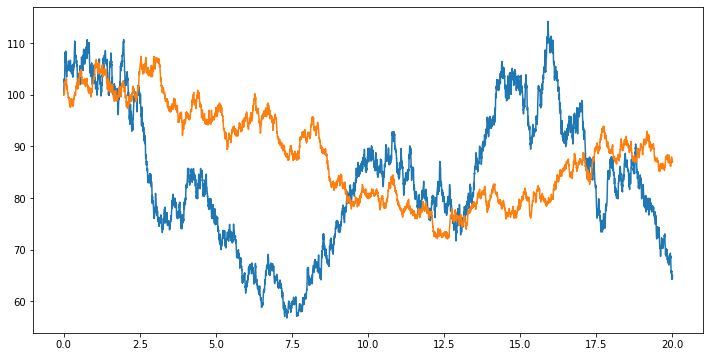

In [11]:
PlotPaths(data,plotParam)

<br>

#### __Estimating Drift and Volatility parameters from Historical Data__ 

Need to estimate $m$ and $σ$.

_First_, estimate $σ$ as follows. 

Suppose we observe stock prices at fixed small time intervals $∆t$ (e.g., daily price observations) and suppose we have a total of $n + 1$ observations (e.g., daily closing prices): 

$\{S_i = S(t_i),~i = 0, 1,...,n\}$:

Our model states that:

$\ln \frac{S_{i}}{S_{i-1}} = \left(m - \frac{\sigma^2}{2}\right)\Delta t + \sigma \sqrt{\Delta t}\epsilon_{i},~~~~~i = 1,...,n$

Define $u_i = \ln \frac{S_{i}}{S_{i-1}}$ as the continuously compounded rate of return over the ith interval.

Then the estimate $\hat{σ}$ can be obtained from (sample variance): 

$\hat{σ}^2\Delta t = \frac{1}{n-1}\sum_{i=1}^{n}(u_i-\bar{u})^2$, where $\bar{u}$ is the sample mean of $u_i$.

_Second_, the estimate $\hat{m}$ from:


$\left(\hat{m} - \frac{\hat{σ}^2}{2}\right)\Delta t = \bar{u}$

<br>

## __Black-Sholes-Merton model__

Consider a European-style derivative security with the payoff $F(S_T)$ at expiration at $T$.

The Black-Scholes-Merton model solves the following problems:

1. _What is the price $f_t = f(S_t,t)$ of this security at some time $t < T$ when the underlying asset price is $S_t$?_ 

2. _How do we hedge this security?_

The derivation is similar to the derivation when the underlying asset follows the binomial process: we will _dynamically replicate_ the security by trading the underlying asset.

#### __Modeling Assumptions__ 

1. The underlying asset follows geometric Brownian motion starting at $S_0=S$:

    $dS_t = mS_tdt + \sigma S_t dB_t$, $~~~~$where $m$ and $\sigma$ are constants.

2. No restrictions on short sales; 

3.   No transaction costs, bid/ask spread, or taxes;

4.   No dividends during the lifetime of the derivative security; 

5.   No riskless arbitrage opportunities (or they are explored immediately as they occur); 

6.   Securities trading is continuous, securities are infinitely divisible, and there are no liquidity restrictions; 

7.   The continuously compounded risk-free rate $r$ is constant and is the same for all maturities (flat term structure of interest rates).


### __Derivation of the Black-Scholes PDE: dynamic hedging strategy__

The price of our derivative at time $t$ is a function of the underlying price $S_t$ and time $t$. From Ito's lemma: 

$df = \left(\frac{\partial f}{\partial t} + mS \frac{\partial f}{\partial S}+\frac{1}{2}\sigma^2 S^2 \frac{\partial^2 f}{\partial S^2}\right)dt + \sigma S \frac{\partial f}{\partial S}dB$

The key observation is that both the stock and the option have the same source of uncertainty (risk) - Brownian motion process $B$.  

We construct a portfolio with a short position in one derivative $f$ and a long position in $∆$ shares of stock:

$\Pi = ∆S - f$

From Ito's lemma, the change in the portfolio value over $dt$ is given by

$d\Pi = ∆dS - df = 
\\ = ∆(mSdt + \sigma S dB) - \left(\frac{\partial f}{\partial t} + mS \frac{\partial f}{\partial S}+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 f}{\partial S^2}\right)dt - \sigma S \frac{\partial f}{\partial S}dB = 
\\= \sigma S\left(∆-\frac{\partial f}{\partial S}\right)dB + \left(mS(∆-\frac{\partial f}{\partial S})-\frac{\partial f}{\partial t}-\frac{1}{2}\sigma^2 S^2\frac{\partial^2 f}{\partial S^2}\right)dt$

Let us select the number of shares (hedge ratio or delta) $∆$ so that

$∆ = \frac{\partial f}{\partial S}$

This selection makes our portfolio instantaneously riskless - the coefficient in front of the term with the Brownian motion increment $dB$ (risk) vanishes! 

Our portfolio is riskless only for an infinitesimal time period $dt$. To keep our portfolio riskless through the next time period $dt$, we need to re-balance - adjust the delta to reflect the change in the stock price.

Since our portfolio is riskless over $dt$, its rate of return must be equal to the risk-free rate $r$ (otherwise, there is an arbitrage opportunity):

$d\Pi = r \Pi dt$, or $\left(-\frac{\partial f}{\partial t}-\frac{1}{2}\sigma^2 S^2\frac{\partial^2 f}{\partial S^2}\right)dt = r\left(S \frac{\partial f}{\partial S} - f\right)dt$

$\boxed{~~~~~~\\~ \frac{1}{2}\sigma^2 S^2\frac{\partial^2 f}{\partial S^2}+rS \frac{\partial f}{\partial S}+\frac{\partial f}{\partial t} = rf~~~ \\~~~~~ }$

The price of the option $f(S_t,t)$ must satisfy this partial differential equation (PDE) as a consequence of the no arbitrage assumption. Otherwise, there are arbitrage opportunities. 

This is the celebrated Black-Scholes-Merton PDE, also called the fundamental pricing equation. Mathematically, this has the form of diffusion equation. At expiration of the derivative $t+T$ the differential equation should be supplemented with the terminal condition at expiration (payoff):

$f(S,T) = F(S)$

For example, for European Call Options $F(S) = (S-K)^{+}$.

To find derivativeís price at any time $t<T$ prior to expiration we need to solve the Black-Scholes-Merton PDE subject to this terminal condition.

Note that delta (hedge ratio) depends both on the underlying price and time: 

$\boxed{~∆ = ∆(S,T) = \frac{\partial f}{\partial S}~~~}$

where the function    $f(S_t,t)$ is the solution of the Black-Scholes-Merton PDE. As $t$ and $S$ change, we need to rebalance our portfolio at each (infinitesimally small) time step $dt$ -> _dynamic hedging_.  

__Important!__ Note that the drift rate $m$ does not enter the equation. The equation involves risk-free rate $r$ and volatility $σ$ as the only parameters. This is similar to the binomial model - recall that the probability $q$ fell out of the equation! The drift rate of the stock in real world does not matter for pricing derivatives! For the purpose of pricing, we can pretend all investors are risk-neutral (risk-neutral world), set $m = r$, and use the risk-free rate r both as the drift rate of the stock and for discounting.

<br>

### __Risk-neutral valuation. Black-Scholes-Merton Option Pricing Formula__

#### __Stock price process in the risk-neutral world__


In a risk neutral world, the expected return on all investment assets is the risk-free rate $r$ (risk-neutral investors do not demand a premium for the risk). 

$dS_t = r S_t dt + \sigma S_t dB_t $, or

$S_T = S_0 e^{(r - \frac{\sigma^2}{2})T + \sigma B_T}$


#### __Risk-neutral valuation formula__  

One way to proceed is to find the option price by directly solving the PDE subject to the payoff condition.

Alternative and more convenient way is to calculate the option price in the risk-neutral world. In this world, the price of a financial intrument is equal to the discounted expected value of its payoff.

$\boxed{~~~~~~~\\ f(S_t,t) = e^{-r\tau}E_{t,S}[F(S_T)]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(3)~~~~~\\ ~~~~\\ S_T = S_0 e^{(r - \frac{\sigma^2}{2})\tau + \sigma \sqrt{\tau}\epsilon}, ~~~~~\tau = T-t\\~~~~~} $

This is the _risk-neutral valuation formula_. The risk-free rate $r$ is used as the discount rate. In the risk-neutral world, given todayís stock price $S$ at time $t$, the future stock price $S_T$ at time $T > t$  is lognormally distributed.

$~~$

__Forward Contracts__

Consider a forward contract with strike $K$ and maturity $T$. Its payoff function is equal to $S_T-K$.

By applying the risk-neutral valuation formula to the payoff, we can find the price of the forward contract at at time $t<T$.
 
 
$f(S_t,t) = e^{-r\tau}E_{t,S}[S_T]-K = S -  e^{-r\tau}K$ 

where we used the formula for the mean of the lognormal distribution:

$E_{t,S}[S_T] = e^{r\tau}S$

Not surprisingly, this is the same formula we obtained previously from the no-arbitrage argument!  

It is instructive to check that this value of the forward contract does indeed satisfy the BSM PDE: calculating all the necessary derivatives, the BS PDE reduces to:

$rS - re^{-r\tau}K = r(S - e^{-r\tau}K)$



<br>

#### __The Black-Scholes Option Pricing Formula__ 

The call price is given by the discounted risk-neutral expectation according to eq.(3):


$C(S,t) = e^{-r\tau}E[(S_T-K)^{+}] = e^{-r\tau}(E[S_T 1_{S_T>K}]-KE[1_{S_T>K}])$

Let's introduce:

$d_{-} = \frac{\ln S/K+\mu\tau}{\sigma \sqrt{\tau}}$


Note, that event $S_T = S e^{\left(r - \frac{\sigma^2}{2}\right)\tau + \sigma \sqrt{\tau}\epsilon }> K$ is equivalent to the event $\epsilon > \frac{\ln K/S-(r - \frac{\sigma^2}{2})\tau}{\sigma \sqrt{\tau}} = -d_{-}$.

Then

$C(S,t) = e^{- \frac{\sigma^2}{2}\tau}SE[ e^{\sigma \sqrt{\tau}\epsilon } 1_{\epsilon >-d_{-} }]-e^{-r\tau}KE[1_{\epsilon >-d_{-} }]$


The expectation in the second term: 

$E[1_{\epsilon >-d_{-} }] = Pr(\epsilon >-d_{-}) = Pr(-\epsilon <d_{-})=$ {by symmentry of normal distribution} $= N(d_{-})$.

This is also can be writen as: $1- N(-d_{-}) = N(d_{-})$

The expectation in the first term: 

$E[ e^{\sigma \sqrt{\tau}\epsilon } 1_{\epsilon >-d_{-} }] =\frac{1}{\sqrt{2\pi}} \int_{-d_{-}}^{∞}e^{-\frac{y^2}{2}+\sigma \sqrt{\tau}y}dy = $

$\frac{1}{\sqrt{2\pi}} \int_{-d_{-}}^{∞}  e^  {-\frac{\left(y-\sigma \sqrt{\tau}\right)^2}{2}+\frac{\sigma^2 \tau}{2}} dy=$ 

{change of variable: $z=y-\sigma \sqrt{\tau}~$; also introduce $d_{+} = d_{-}+\sigma \sqrt{\tau}$} 

$=\frac{1}{\sqrt{2\pi}} \int_{-d_{+}}^{∞}  e^  {-\frac{z^2}{2}+\frac{\sigma^2 \tau}{2}} dz= e^  {\frac{\sigma^2 \tau}{2}}(1- N(-d_{+})) = e^  {\frac{\sigma^2 \tau}{2}}N(d_{+}) $


Substituting the results for both terms in the call pricing formula, we finally arrive at: 

<br>

__The Black-Scholes Call Pricing Formula__  
$ \boxed{~~~~\\
~C = SN(d_{+}) - e^{-r \tau}KN(d_{-}),\\ ~~~~~~~~~~~~~~~~  \\ ~ d_{-} = \frac{\ln\left(\frac{S}{K}\right)+(r-\frac{1}{2}\sigma^2)\tau}{\sigma \sqrt{\tau}},~~~~d_{+} = d_{-} + \sigma \sqrt{\tau}~~\\~~~}
$

<br>

_Financial meaning of terms in BS formula_:

* $SN(d_{+})$: expected value of receiving the stock at maturity, provided the call finishes in the money 

* $e^{-r \tau}KN(d_{-})$: expected value of paying the strike, provided the call finishes in the money

<br>

__Delta__ 

To calculate the call delta take the first derivative of the option's price with respect to $S$: 


$\Delta = \frac{\partial C}{\partial S} = N(d_{+})$

where we have used the following identity (can be verified directly by differentiating):

$S \frac{\partial N(d_{+})}{\partial S} - e^{-r\tau} K \frac{\partial N(d_{-})}{\partial S} = 0$

Thus, we can also re-write the option pricing formula in the form:

$C = \Delta S - B$

Compare this to the binomial pricing formula! 

<br>

__Europian Puts__

A similar derivation yields the put pricing formula: 

$ \boxed{~~~~\\
~~~~P =  e^{-r \tau}KN(-d_{-}) - SN(-d_{+}) ~~~~\\ ~~~~~~~~~~~~~~~~ }
$

It is now easy to verify the put-call parity:

$C-P = S [N(d_{+}) + N(-d_{+})] - e^{-r \tau}K[N(d_{-}+N(-d_{-}] = S - e^{-r \tau}K$

where we have used the identity

$N(x) + N(-x) =1$

<br>

## __Options on Stock Indexes and Foreign Currencies__

Stock indices and currencies are analogous to stocks paying dividend yields. To be able to price options on these assets, we need to extend Black-Scholes formula for the assets paying continous dividends. 

The asset with continuous dividend $q$ follows

$dS_t = (m-q)S_tdt + \sigma S_t dB_t$

Underlying priceís drift over $dt$ is reduced by the dividends $qS_t dt$ paid.

* Recall that $m$ is the expected total rate of return from the underlying = sum of both return due to the price appreciation (capital gains) and dividends: $mSdt = (m-q)Sdt  +   qSdt$.

Now reconsider the hedged portfolio used in the derivation of the Black-Scholes-Merton model


$\Pi = ∆S - f$.

A change in the portfolio value over an infinitesimal time period $dt$ is:

$d\Pi = ∆(dS+qSdt) - df$.

The key observation is that the portfolio also receives dividends during $dt$. Selecting delta

$∆ = \frac{\partial f}{\partial S}$

stochastic terms with $dB$ cancel out and the portfolio is instantaneously riskless.

Following the logic similar to the case without dividends (just derived above) we get that:

$\frac{1}{2}\sigma^2 S^2\frac{\partial^2 f}{\partial S^2}+(r-q)S \frac{\partial f}{\partial S}+\frac{\partial f}{\partial t} = rf$

The solution to this PDE subject to some terminal payoff condition


$f(S,T) = F(S)$

is given by the discounted risk-neutral expectation 

$f(S_t,t) = e^{-r\tau}E_{t,S}[F(S_T)]$

with respect to the risk-neutral process

$dS_t = (r-q) S_t dt + \sigma S_t dB_t $

$S_T = S e^{\left(r -q- \frac{\sigma^2}{2}\right)\tau + \sigma \sqrt{\tau}\epsilon}$ 

To accomodate BS formula for dividend case, use the following trick.

Rewrite the previous expression in the form:

$S_T = e^{-q\tau}S e^{\left(r - \frac{\sigma^2}{2}\right)\tau + \sigma \sqrt{\tau}\epsilon}$ 

Thus, the distribution of $S_T$ with the dividend yield $q$ is the same as the distribution of $S_T$ without the dividend but with the substitution: 

$S \to e^{-q\tau}S$

#### __The Black-Scholes European Option Pricing Formula adjusted for dividends__ 

$C = e^{-q \tau}SN(d_{+}) - e^{-r \tau}KN(d_{-})$
 
$P = e^{-r \tau}KN(-d_{-}) - e^{-r \tau}KN(-d_{+})$

$d_{-} = \frac{\ln\left(\frac{S}{K}\right)+\left(r-q-\frac{1}{2}\sigma^2\right)\tau}{\sigma \sqrt{\tau}},~~~~d_{+} = d_{-} + \sigma \sqrt{\tau}$

<br>

#### __Stock Index Options__


A stock index can be approximated as an asset with continuous dividend yield $q$.
 
The estimate of $q$ is calculated the average annualized dividend yield during the
life of the contract. Only dividends with ex-dividend date before maturity of the option are used for estimation.

<br>

#### __FX Options Pricing__

Suppose $r_d$ and $r_f$ are domestic and foreign risk-free interest rates, respectively. Foreign currency can be viewed as a risky asset priced in the units of domestic currency that pays continuous dividends with the dividend yield $r_f$. Thus we can use The Black-Scholes formula adjusted for dividends with $r = r_d$ and $q = r_f$ to calculate FX option prices.